### Optimize XYZ1 with GA

In [1]:
from deap import base, creator, tools, algorithms
import numpy as np
import random
import RSC_sim
from datetime import datetime
from matplotlib import pyplot as plt

### Original as reference, 25 $\mu K$

In [3]:
def cost_function(mol_list) -> int:
    """Your original success count: n_x<=1 and n_y<=1.
    Modify if you want z or harsher thresholds.
    """
    good = 0
    for mol in mol_list:
        if mol.n[0] <= 1 and mol.n[1] <= 1 and mol.n[2] <= 28 and mol.state == 1 and mol.spin == 0 and not mol.islost:
            good += 1
    return good

In [8]:
XY_seq = RSC_sim.load_sequence('../XY/best_sequence.txt')
XYZ1_original = RSC_sim.load_sequence('sequence_XYZ1.txt')
seq_original = XY_seq + XYZ1_original

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:16<00:00, 59.79it/s]


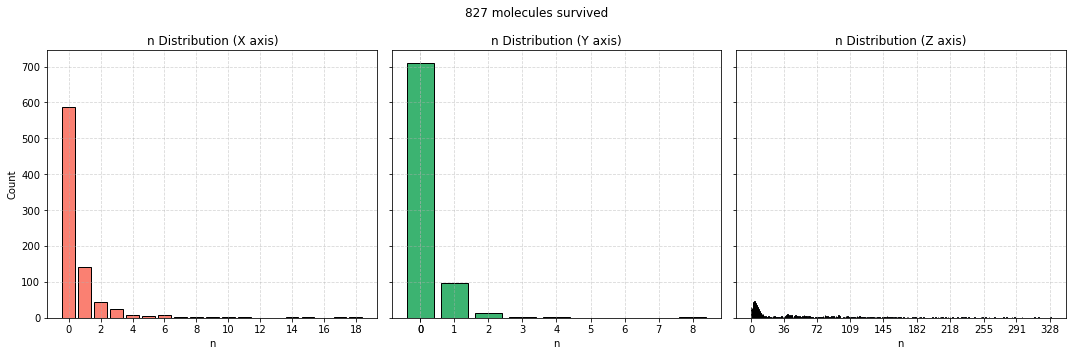

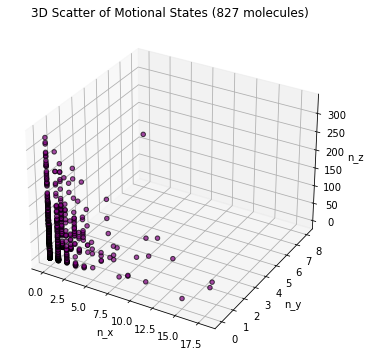

380


In [9]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_ = RSC_sim.apply_raman_sequence(mol_list, seq_original)
counts_x, counts_y, counts_z = RSC_sim.get_n_distribution(mol_list)
print(cost_function(mol_list))

In [4]:
XY_seq = RSC_sim.load_sequence('../XY/best_sequence.txt')
XYZ1_opt = RSC_sim.load_sequence('sequences/2025-10-24_13-02-12/best_sequence.txt')
seq_opt = XY_seq + XYZ1_opt

Applying pulses to molecules: 100%|██████████| 1000/1000 [00:12<00:00, 77.71it/s]


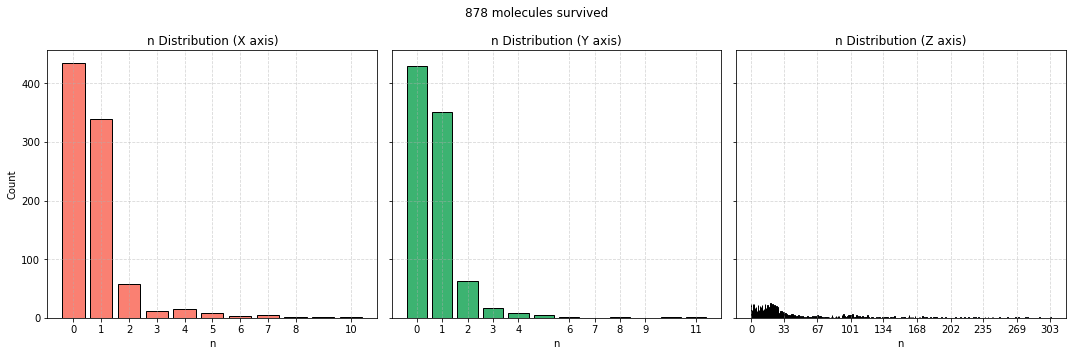

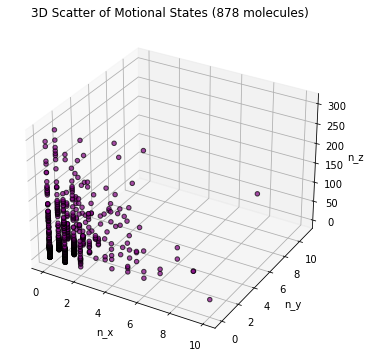

471


In [6]:
mol_list = RSC_sim.initialize_thermal([25e-6, 25e-6, 25e-6], 1000)
_ = RSC_sim.apply_raman_sequence(mol_list, seq_opt)
counts_x, counts_y, counts_z = RSC_sim.get_n_distribution(mol_list)
print(cost_function(mol_list))

In [9]:
len(XYZ1_original)

40